# Encriptación

La encriptación es un proceso que codifica información para que solo personas autorizadas, que posean la clave correcta, puedan entenderla. Transforma los datos legibles (texto plano) en texto incomprensible (texto cifrado) mediante algoritmos matemáticos y claves, protegiendo la privacidad al dificultar el acceso no autorizado a la información, ya sea que esté almacenada o en tránsito.



## Tipos principales de encriptación
Los principales tipos de cifrado son simétrico y asimétrico. El cifrado simétrico usa una única clave secreta para cifrar y descifrar, mientras que el asimétrico (o clave pública) usa un par de claves: una pública para cifrar y una privada para descifrar.

### Cifrado Asimétrico


El cifrado asimétrico, o de clave pública, usa un par de claves vinculadas matemáticamente: una pública para cifrar y una privada para descifrar. La clave pública se distribuye ampliamente, permitiendo que cualquiera cifre un mensaje para el destinatario. Sin embargo, solo la clave privada correspondiente, que el destinatario mantiene en secreto, puede descifrar ese mensaje. Este sistema es crucial para la confidencialidad y la autenticación a través de firmas digitales.

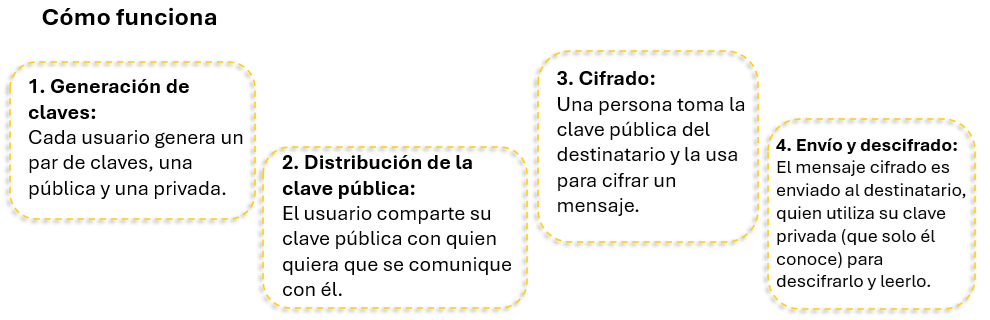

#### Cifrado RSA (Rivest, Shamir y Adleman)
El algoritmo RSA es un sistema de cifrado asimétrico que utiliza un par de claves, una pública y otra privada, para asegurar la comunicación y la autenticación. Se basa en la dificultad de factorizar grandes números primos. La clave pública, compartida abiertamente, se usa para cifrar datos, mientras que la clave privada, que se mantiene en secreto, se utiliza para descifrarlos. RSA es fundamental en la seguridad de internet, autenticando la identidad mediante firmas digitales y protegiendo las transferencias de datos sensibles en protocolos como TLS/SSL.

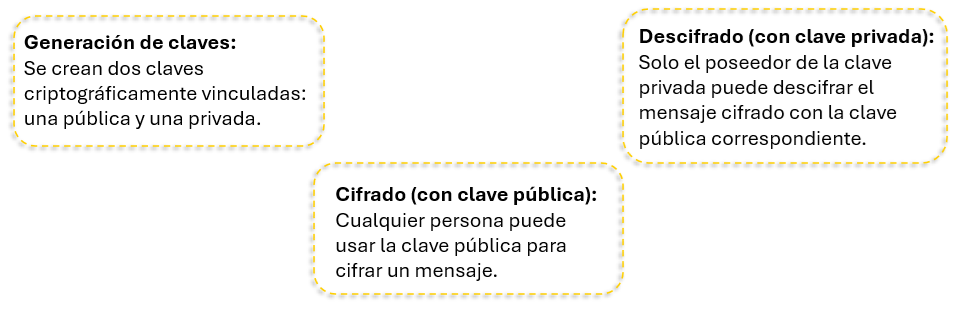

##### Ejemplo RSA clásico

Vamos a simular RSA con primos pequeños para entender cómo funciona:

---

##### 1. Generación de claves
- Escogemos dos números primos:  
  $( p = 3 ), ( q = 11 )$  
- Calculamos:  
  $( n = p \times q = 3 \times 11 = 33 )$  
- Calculamos la función de Euler:  
  $( \varphi(n) = (p-1)(q-1) = 2 \times 10 = 20 )$  
- Elegimos un número **e** coprimo (el único divisor común entre ellos debe ser 1) con $(\varphi(n))$:  
  $( e = 3 )  $
- Calculamos el inverso modular de \(e\):  
  $( d = 7 )$, porque $( 3 \times 7 = 21 \equiv 1 \pmod{20} )  $


Claves:
- Clave pública $= (e=3, n=33)$  
- Clave privada $= (d=7, n=33)$  

---

##### 2. Cifrado
Queremos enviar el mensaje $( m = 4 )$.  

$
c = m^e \mod n = 4^3 \mod 33
$  

$
c = 64 \mod 33 = 31
$  

El mensaje cifrado es **31**.  

---

##### 3. Descifrado
Usamos la clave privada para recuperar el mensaje:  
$
m = c^d \mod n = 31^7 \mod 33
$  

Calculando:  
- $ 31^7 = 27,512,614,111 $  

- $ 27,512,614,111 \mod 33  = 4 $   

Recuperamos el mensaje original: **4**

---

##### Conclusión
- Lo que se cifra con la **clave pública** solo se puede abrir con la **clave privada**.  
- Este es RSA en su forma más sencilla.  
- En la práctica se usan números muy grandes (2048 o 4096 bits) para que nadie pueda romperlo.

In [20]:
import math

###### Generación de claves

In [21]:
# Claves
p, q = 3, 11
n = p * q                # n = 33
phi = (p-1) * (q-1)      # phi = 20

print("Primos elegidos: (p={}, q={})".format(p, q))


Primos elegidos: (p=3, q=11)


In [22]:
def es_coprimo(a, b):
    return math.gcd(a, b) == 1

coprimos = [e for e in range(2, phi) if es_coprimo(e, phi)]
print(f"Valores de e que son coprimos con φ({n}) = {phi}:")
print(coprimos)

Valores de e que son coprimos con φ(33) = 20:
[3, 7, 9, 11, 13, 17, 19]


In [23]:
# elegimos el primero
e = coprimos[0]
print("Clave pública: (e={}, n={})".format(e, n))

Clave pública: (e=3, n=33)


In [24]:
# d es tal que (e * d) % phi = 1
d = pow(e, -1, phi)  # inverso modular en Python
print("Clave privada: (d={}, n={})".format(d, n))

Clave privada: (d=7, n=33)


###### Mensaje

In [25]:
# Mensaje original
m = 4
print("Mensaje original:", m)

Mensaje original: 4


###### Cifrado

In [26]:
# Cifrado
c = (m ** e) % n
print("Mensaje cifrado:", c)

Mensaje cifrado: 31


###### Descifrado

In [27]:
# Descifrado
m_recuperado = (c ** d) % n
print("Mensaje descifrado:", m_recuperado)

Mensaje descifrado: 4


##### Ejercicio

Se quiere enviar un mensaje confidencial a Ana.

Mensaje: *Haz de cada día tu obra maestra*

Ana genera un par de claves:

🔓 Clave pública → se comparte con todos.

🔑 Clave privada → solo ella la tiene y nunca se comparte.

El remitente cifra el mensaje con la clave pública de Ana.

Solo Ana, con su clave privada, puede descifrarlo y leerlo.



Para resolverlo usaremos la librería de python ```cryptography``` y esa usa: RSA-OAEP (Optimal Asymmetric Encryption Padding), junto a cifrado SHA256, que convierte cualquier dato en una “huella digital” de 256 bits. Esto porque RSA clasico no esta disponible y el SHA-256 se usa como herramienta auxiliar para que sea robusto en la vida real.



Librerías

In [5]:
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes

In [6]:
# el mensaje esta en formato utf-8
mensaje = "Haz de cada día tu obra maestra".encode("utf-8")

In [7]:
# 1. Generar par de claves
private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
public_key = private_key.public_key()

In [8]:
# 2. Cifrado con la clave pública
cifrado = public_key.encrypt(
    mensaje,
    padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()),
                 algorithm=hashes.SHA256(),
                 label=None)
)

print("Texto cifrado:", cifrado[:300], "...")

Texto cifrado: b'\t\xf2}G\xd8\xaaX\x9bi\xdb\xc4\xfa0\xd3\xf1\x1eux\xbbOU\x94\x1e\x06\x87-\x0b\x19y\x1dS:a\xd8\x88S\x80\xb6\xaf\x9f*Aa\xb2\x01\x8b5*\xa5\xfd\x1c^xUG\xc7R5\xcfV\xc1[\xc6\xde6\xfb\xd8\x8b (R\xc6\xcc\xb1\xd6w\x81\xe9\x96\xda\xda\xa3\x88\x85XbV7H\xb3\xa7\x82\xe3T\xf5\x90\x80V\x97\xa0\xbd\x1d\x8b\x18<\x89\xe4gk2\x84\xda\xd82\x08T\xaa\x1fE\xc7\xdc\xcduM:\x1b\xab\xb0f\xc3\xaf\xbbt0<\xca\xd2sd\xca\xbav`5\x12z\xbckc\xc9r\xc2u\xdd%\n\x89\x07\xc6\x1c\xe0b\xcb\xc0L\xe2\x0c\x93\x14\xf1VR\xfd\x08\x0b\x92\x08\x1d\x01\xe6NG\xe7Q\xa2\x93\x02\x06\xb2^\x07"B@\x17\xfc\x8eI\xe3\x84\x9819\x8a\x9f\xb7c\x13\xe3\xf7\xd9/@\x0e\xf9\xa3T\xd5\x89\xc75A\r\'\x12Dz\xb3\xa6\x86`\xc6hf\x88\x82\xec<*\x0c\xc0\x1aU\x9c\xde\xa9\xdc\x8a\xe7bh\x19\x18\xf3#c' ...


In [9]:
# 3. Descifrado con la clave privada
descifrado = private_key.decrypt(
    cifrado,
    padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()),
                 algorithm=hashes.SHA256(),
                 label=None)
)

print("Texto descifrado:", descifrado.decode())


Texto descifrado: Haz de cada día tu obra maestra


### Cifrado Simétrico

Los tipos principales de cifrado simétrico son los cifrados de bloque y los cifrados de flujo, donde los cifrados de bloque procesan datos en bloques de tamaño fijo (como AES), mientras que los de flujo los procesan de forma continua, bit a bit o byte a byte (como RC4).
- Son ideales para cifrar grandes volúmenes de datos, como sistemas de archivos, bases de datos o copias de seguridad.
- Son muy útiles para la transmisión en tiempo real de datos, como video o audio.

##### Casos de uso para el cifrado simétrico
- Seguridad de datos (especialmente para grandes cantidades de datos)
- Comunicación y navegación web seguras
- Seguridad en la nube
- Cifrado de bases de datos
- Integridad de los datos
- Cifrado de archivos, carpetas y discos
- Cifrado basado en hardware
- Gestión del cumplimiento



#### Advanced Encryption Standard (AES)
Es un algoritmo de cifrado simétrico de bloque que protege datos sensibles transformando información legible en un formato seguro e ilegible, utilizando la misma clave para cifrar y descifrar.

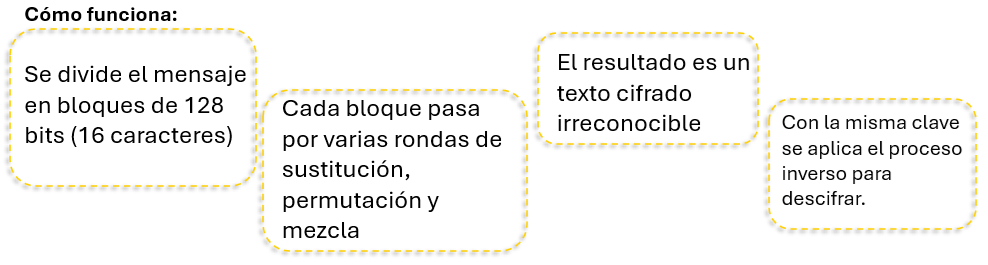

##### Ejercicio AES (Cifrado Simétrico)
Queremos proteger el mensaje: "Hola Ciberseguridad".  
Usaremos el algoritmo AES (Advanced Encryption Standard) en modo ECB con una clave de 128 bits.  
La misma clave servirá para cifrar y descifrar (cifrado simétrico).

In [2]:
# Instalamos la librería de Crypto
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.9 MB/s eta 0:00:00


In [10]:
# importamos Librerías
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64

In [11]:
clave = b'MiClaveSecreta12'  # 16 bytes = 128 bits
mensaje = b'Hola Ciberseguridad'        # mensaje original (corto)

In [12]:
# Crear objeto AES (modo ECB)
cifrado_aes = AES.new(clave, AES.MODE_ECB)


# Cifrado (con padding)
mensaje_padded = pad(mensaje, AES.block_size)  # ajusta al múltiplo de 16
texto_cifrado = cifrado_aes.encrypt(mensaje_padded)
print("Texto cifrado (base64):", base64.b64encode(texto_cifrado).decode())

Texto cifrado (base64): A0I1v1DpfovibWQN46XPuhcAaqS9GejijTkkaU/HOeU=


In [13]:
# Descifrado (y quitar padding)
descifrado_aes = AES.new(clave, AES.MODE_ECB)
mensaje_descifrado = unpad(descifrado_aes.decrypt(texto_cifrado), AES.block_size)
print("Texto descifrado:", mensaje_descifrado.decode())

Texto descifrado: Hola Ciberseguridad
